**Movie IMDB Statistical Analysis**
Required packages: Numpy, Pandas(?), Datascience, MXNet

In [1]:
import numpy as np
import math
import pandas as pan
from datascience import *
from math import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


In [2]:
meta = Table().read_table('movie_metadata.csv')
meta = meta.select("movie_title", "imdb_score", "director_name", "num_critic_for_reviews", "duration", "director_facebook_likes", "actor_1_facebook_likes", "gross", "genres", "actor_1_name", "num_voted_users", "cast_total_facebook_likes", "plot_keywords", "num_user_for_reviews", "content_rating", "budget", "movie_facebook_likes")
for label in meta.labels:
    meta = meta.where(label, lambda x: x != "nan" if isinstance(x, str) else not math.isnan(x)) 
meta.sort("imdb_score", descending = True)

movie_title,imdb_score,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,content_rating,budget,movie_facebook_likes
The Shawshank Redemption,9.3,Frank Darabont,199,142,0,11000,2.83415e+07,Crime|Drama,Morgan Freeman,1689764,13495,escape from prison|first person narration|prison|prison ...,4144,R,2.5e+07,108000
The Godfather,9.2,Francis Ford Coppola,208,175,0,14000,1.34822e+08,Crime|Drama,Al Pacino,1155770,28122,crime family|mafia|organized crime|patriarch|rise to power,2238,R,6e+06,43000
The Godfather: Part II,9,Francis Ford Coppola,149,220,0,22000,5.73e+07,Crime|Drama,Robert De Niro,790926,39960,1950s|corrupt politician|lake tahoe nevada|melancholy|re ...,650,R,1.3e+07,14000
The Dark Knight,9,Christopher Nolan,645,152,22000,23000,5.33316e+08,Action|Crime|Drama|Thriller,Christian Bale,1676169,57802,based on comic book|dc comics|psychopath|star died befor ...,4667,PG-13,1.85e+08,37000
"The Good, the Bad and the Ugly",8.9,Sergio Leone,181,142,0,16000,6.1e+06,Western,Clint Eastwood,503509,16089,civil war|hitman|outlaw|shootout|spaghetti western,780,Approved,1.2e+06,20000
Pulp Fiction,8.9,Quentin Tarantino,215,178,16000,13000,1.0793e+08,Crime|Drama,Bruce Willis,1324680,16557,black comedy|cunnilingus|neo noir|nonlinear timeline|pos ...,2195,R,8e+06,45000
Schindler's List,8.9,Steven Spielberg,174,185,14000,14000,9.60672e+07,Biography|Drama|History,Liam Neeson,865020,15233,german|german soldier|jew|jewish|nazi,1273,R,2.2e+07,41000
The Lord of the Rings: The Return of the King,8.9,Peter Jackson,328,192,0,5000,3.77019e+08,Action|Adventure|Drama|Fantasy,Orlando Bloom,1215718,6434,battle|epic|king|orc|ring,3189,PG-13,9.4e+07,16000
Star Wars: Episode V - The Empire Strikes Back,8.8,Irvin Kershner,223,127,883,11000,2.90159e+08,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,837759,12643,duel|famous twist|rebel|rescue|snowy landscape,900,PG,1.8e+07,17000
Forrest Gump,8.8,Robert Zemeckis,149,142,0,15000,3.29691e+08,Comedy|Drama,Tom Hanks,1251222,15700,amputee|love|vietnam|vietnam war|war hero,1398,PG-13,5.5e+07,59000


In [3]:
def getR(table, col1, col2):
    table.scatter(col1, col2)
    table = table.where(col1, lambda x: not math.isnan(x)).where(col2, lambda x: not math.isnan(x))
    stand1 = (table.column(col1)-np.mean(table.column(col1)))/np.std(table.column(col1))
    stand2 = (table.column(col2)-np.mean(table.column(col2)))/np.std(table.column(col2))
    r = np.mean(stand1*stand2)
    return r
#print(getR(meta.sort('budget').take(np.arange(meta.num_rows-1000)), 'budget', 'imdb_score'))
#print(getR(meta, 'movie_facebook_likes', 'imdb_score'))

In [4]:
#def floatize(arr):
#    new_arr = np.array([])
#    suc, fail = 0, 0
#    for i in arr:
#        try:
#            suc+=1
#            new_arr = np.append(new_arr, float(i))
#        except ValueError:
#            fail+=1
#            print(i)
#            new_arr = np.append(new_arr, -1.0)
#    print('successes: ', suc)
#    print('fails: ', fail)
#    return new_arr
#imdb = imdb.with_column('imdb_score', floatize(imdb.column('imdbRating'))).where('imdb_score', lambda x: x!=-1)

We now have both datasets loaded. 

Lets start with the meta table to train a neural net in mxnet.

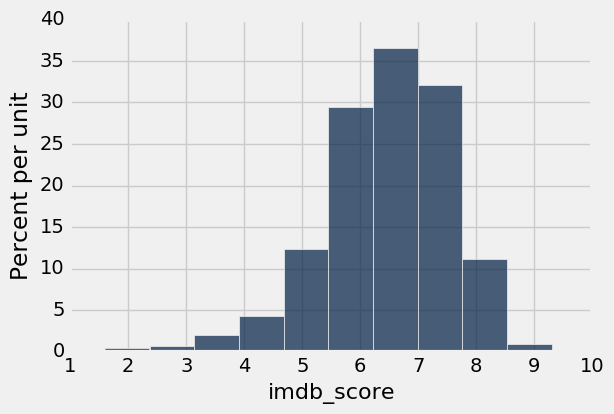

In [5]:
meta.hist("imdb_score")

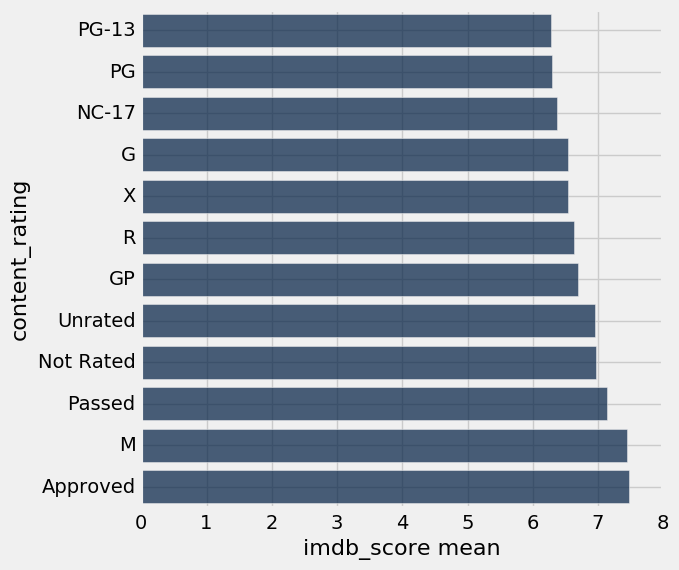

In [6]:
meta.select("content_rating", "imdb_score").group("content_rating", np.mean).sort("imdb_score mean").barh("content_rating")

In [38]:
movies = Table().read_table("movies.csv").drop(2)
ratings = Table().read_table("ratings.csv").drop(0, 3).with_column("rating", ratings.column("rating") * 2)
movie_lens = movies.join("movieId", ratings).drop(0)
movie_lens.sort("rating", descending = True)

title,rating
The Beatles: Eight Days a Week - The Touring Years (2016),10
Rustom (2016),10
The Last Brickmaker in America (2001),10
Survive and Advance (2013),10
Ice Age: The Great Egg-Scapade (2016),10
The Last Days of Emma Blank (2009),10
Me Before You (2016),10
Making a Murderer (2015),10
World of Tomorrow (2015),10
Schneider vs. Bax (2015),10
